In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df=pd.read_csv('retail_data.csv')

In [3]:
df.shape

(302010, 30)

In [4]:
df.head(3)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [6]:
#DATA CLEANING


ds=df.drop(columns=['Transaction_ID','Name','Email','Phone','Address','Zipcode','Order_Status'])
#Dropping the columns that are unnecessary with respect to big picture and also considering that Order_Status is complete for all processes.

In [7]:
ds.isnull().sum()

Customer_ID         308
City                248
State               281
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Ratings             184
products              0
dtype: int64

In [8]:
columnsToFill=['Age','Total_Purchases','Amount','Total_Amount','Ratings']
for column in columnsToFill:
    ds[column]=ds[column].fillna(ds[column].mean())
    ds[column]=ds[column].astype('int')    
#filling all null values in float64 columns with their respective mean values and changing them to whole numbers for simplicity.

In [9]:
ds.isnull().sum()
#checking for null values

Customer_ID         308
City                248
State               281
Country             271
Age                   0
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Ratings               0
products              0
dtype: int64

In [10]:
ds.dropna(inplace=True)
#dropping all rows that contain null values

In [11]:
ds.isnull().sum()
#checking for null values, hoping for a cleaned data

Customer_ID         0
City                0
State               0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Ratings             0
products            0
dtype: int64

In [12]:
ds.shape
#checking shape of cleaned data

(297394, 23)

In [13]:
df.shape[0]-ds.shape[0]
#check for number of rows that got deleted in DATA CLEANING

4616

In [14]:
ds.head(3)

,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,...,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,products
0,37249.0,Dortmund,Berlin,Germany,21,Male,Low,Regular,9/18/2023,2023.0,...,108,324,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,5,Cycling shorts
1,69749.0,Nottingham,England,UK,19,Female,Low,Premium,12/31/2023,2023.0,...,403,806,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,4,Lenovo Tab
2,30192.0,Geelong,New South Wales,Australia,48,Male,Low,Regular,4/26/2023,2023.0,...,354,1063,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,2,Sports equipment


In [15]:
ds[['Age','Total_Purchases','Amount','Total_Amount','Ratings']].describe()
#basic parameters of cleaned data

,Age,Total_Purchases,Amount,Total_Amount,Ratings
count,297394.000000,297394.000000,297394.000000,297394.000000,297394.000000
mean,35.470682,5.359241,254.662444,1367.071262,3.162431
std,15.015317,2.866784,141.310242,1128.255424,1.320606
min,18.000000,1.000000,10.000000,10.000000,1.000000
25%,22.000000,3.000000,132.250000,439.000000,2.000000
50%,32.000000,5.000000,255.000000,1042.000000,3.000000
75%,46.000000,8.000000,377.000000,2027.000000,4.000000
max,70.000000,10.000000,499.000000,4999.000000,5.000000


In [16]:
#EXPLORATORY DATA ANALYSIS

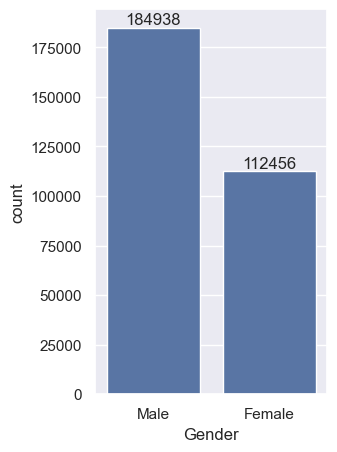

In [17]:
#Plotting graph for Gender
sns.set(rc={'figure.figsize':(3, 5)})
ax = sns.countplot(x = 'Gender' ,data = ds)
for bars in ax. containers:
  ax. bar_label(bars) 

<Axes: xlabel='Gender', ylabel='Total_Amount'>

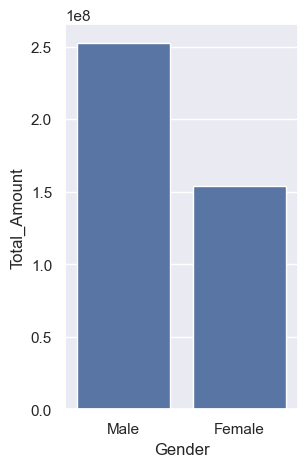

In [18]:
#Plotting graph for Total_Amount vs Gender
sns.set(rc={'figure.figsize':(3, 5)})
sales_gen = ds.groupby(['Gender'], as_index=False)['Total_Amount'].sum().sort_values(by='Total_Amount',ascending=False)
sns.barplot(x ='Gender',y='Total_Amount',data =sales_gen)

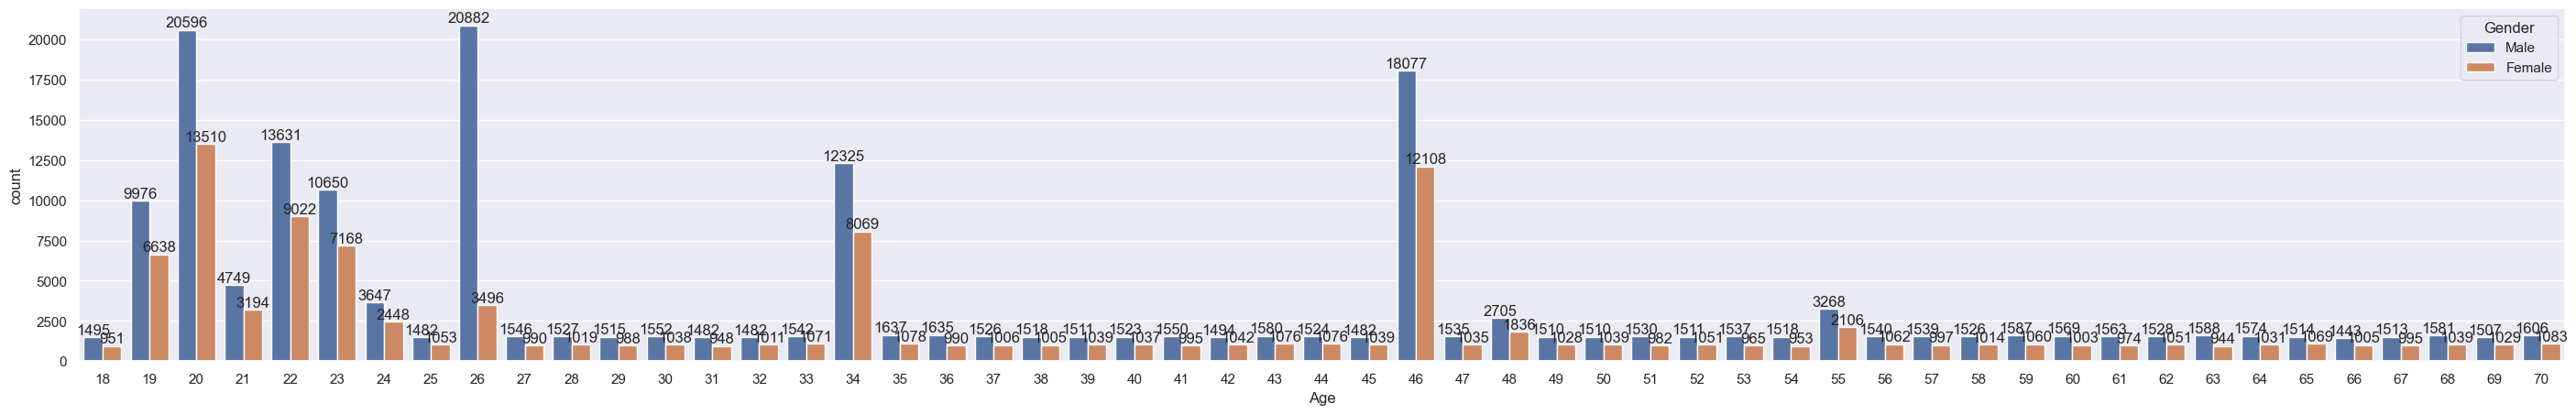

In [19]:
#Age

sns.set(rc={'figure.figsize':(35, 5)})
ax = sns.countplot(x = 'Age' ,hue='Gender', data = ds)
for bars in ax. containers:
  ax. bar_label(bars) 

<Axes: xlabel='Age', ylabel='Total_Amount'>

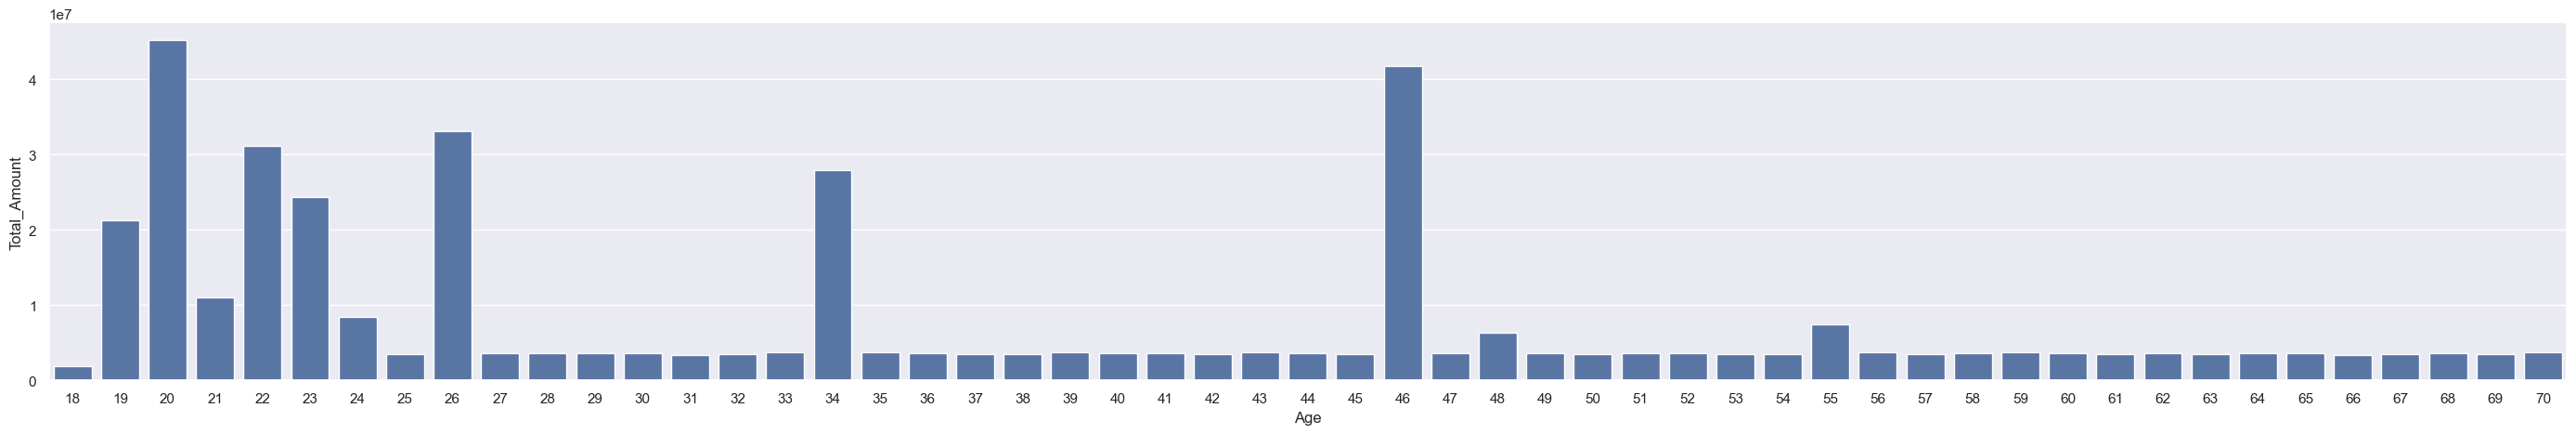

In [20]:
sales_gen = ds.groupby(['Age'], as_index=False)['Total_Amount'].sum().sort_values(by='Total_Amount',ascending=False)
sns.barplot(x ='Age',y='Total_Amount',data =sales_gen)

<Axes: xlabel='Country', ylabel='Total_Purchases'>

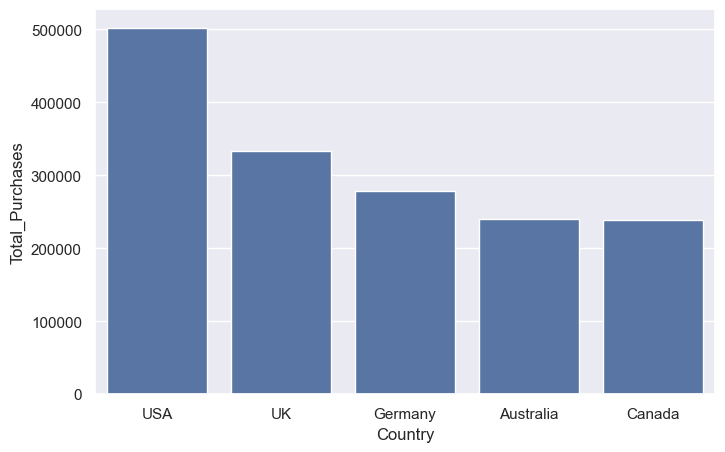

In [21]:
sns.set(rc={'figure.figsize':(8, 5)})

#CountryVsTotal_Purchases
sales_gen = ds.groupby(['Country'], as_index=False)['Total_Purchases'].sum().sort_values(by='Total_Purchases',ascending=False)
sns.barplot(x ='Country',y='Total_Purchases',data =sales_gen)




<Axes: xlabel='Country', ylabel='Total_Amount'>

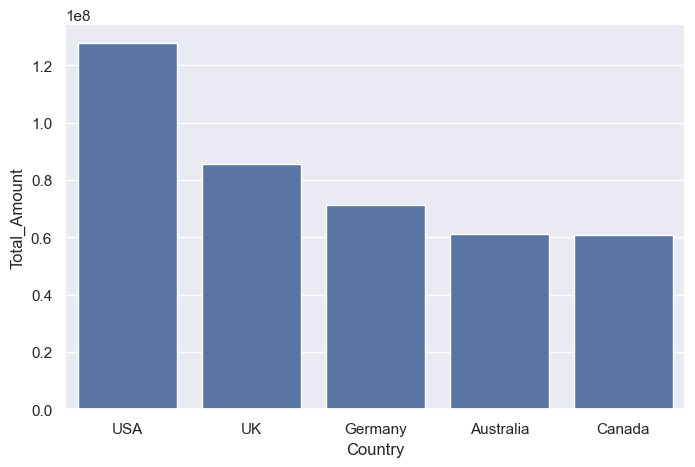

In [22]:
sns.set(rc={'figure.figsize':(8, 5)})

#CountryVsTotal_Amount
sales_gen = ds.groupby(['Country'], as_index=False)['Total_Amount'].sum().sort_values(by='Total_Amount',ascending=False)
sns.barplot(x ='Country',y='Total_Amount',data =sales_gen)

<Axes: xlabel='State', ylabel='Total_Purchases'>

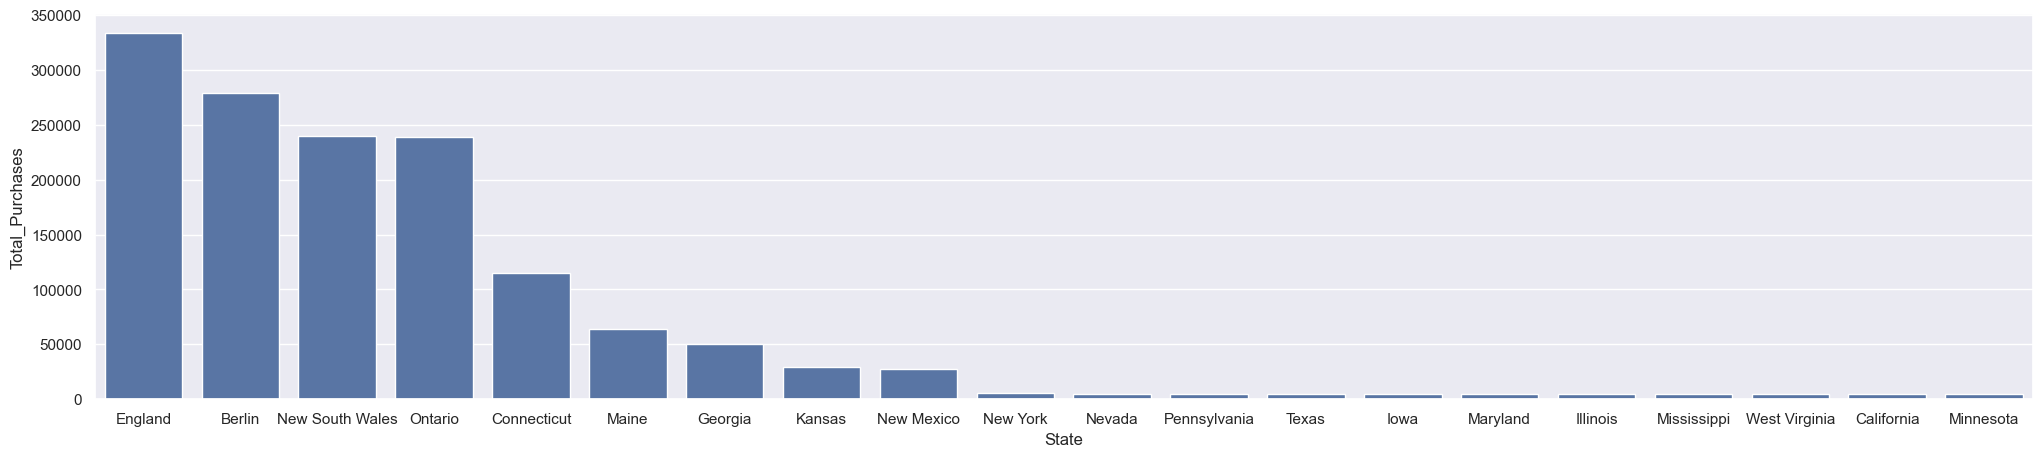

In [23]:
sns.set(rc={'figure.figsize':(25, 5)})

#StateVsTotal_Purchases
sales_gen = ds.groupby(['State'], as_index=False)['Total_Purchases'].sum().sort_values(by='Total_Purchases',ascending=False).head(20)
sns.barplot(x ='State',y='Total_Purchases',data =sales_gen)

<Axes: xlabel='State', ylabel='Total_Amount'>

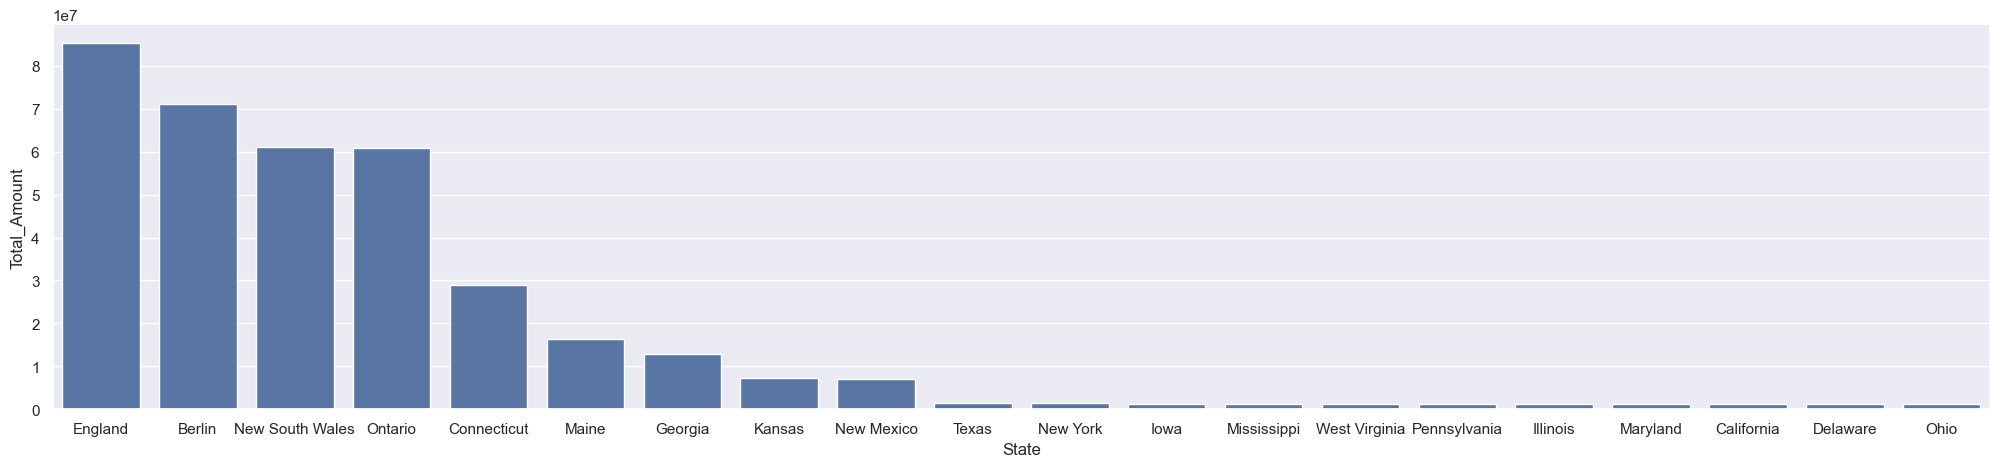

In [24]:
sns.set(rc={'figure.figsize':(25, 5)})

#StateVsTotal_Amount
sales_gen = ds.groupby(['State'], as_index=False)['Total_Amount'].sum().sort_values(by='Total_Amount',ascending=False).head(20)
sns.barplot(x ='State',y='Total_Amount',data =sales_gen)

In [25]:
ds.columns

Index(['Customer_ID', 'City', 'State', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Ratings', 'products'],
      dtype='object')

Text(0, 0.5, 'Average Total Amount Spent')

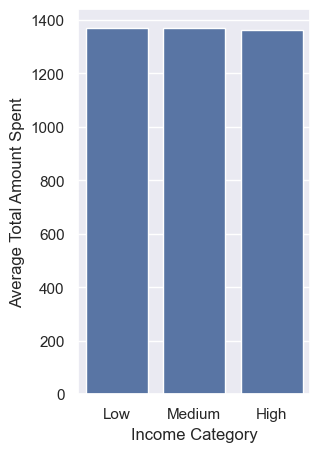

In [26]:
sns.set(rc={'figure.figsize':(3,5)})

#IncomeVsTotal_Amount_Average
sales_gen = ds.groupby(['Income'], as_index=False)['Total_Amount'].mean().sort_values(by='Total_Amount',ascending=False)
sns.barplot(x ='Income',y='Total_Amount',data =sales_gen)
plt.xlabel('Income Category')
plt.ylabel('Average Total Amount Spent')

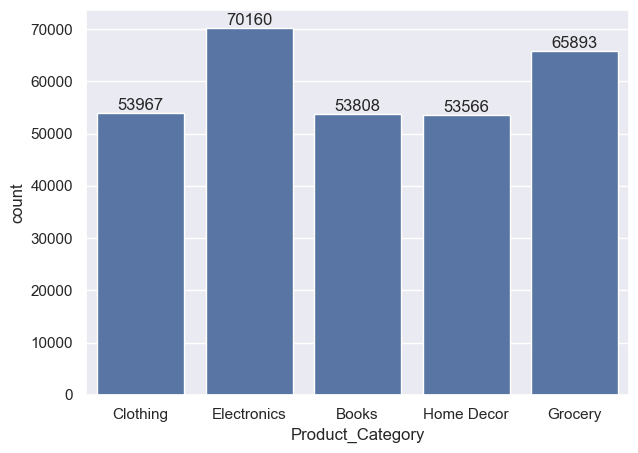

In [27]:
#Product_Category
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.countplot(x = 'Product_Category' ,data = ds)
for bars in ax. containers:
  ax. bar_label(bars) 

<Axes: xlabel='Product_Category', ylabel='Total_Amount'>

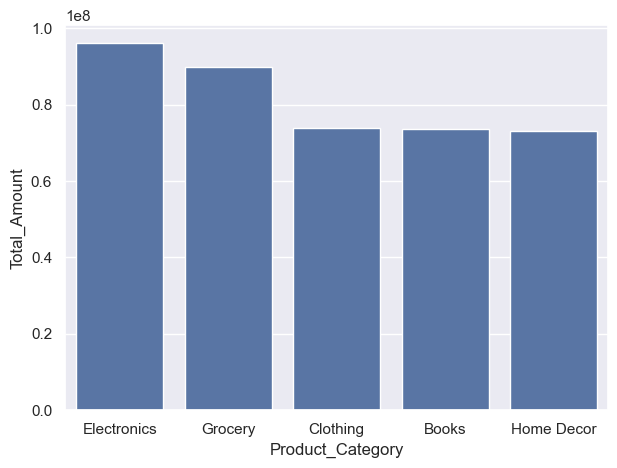

In [28]:
#Product_CategoryVsTotal_Amount
sales_gen = ds.groupby(['Product_Category'], as_index=False)['Total_Amount'].sum().sort_values(by='Total_Amount',ascending=False)
sns.barplot(x ='Product_Category',y='Total_Amount',data =sales_gen)

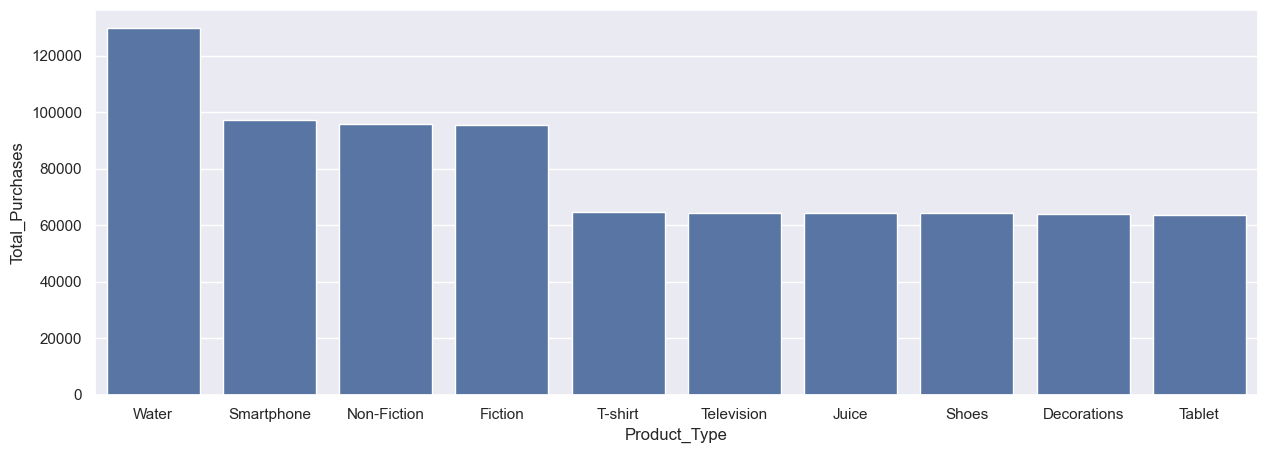

In [29]:
#Product_TypeVsTotal_Purchases
sns.set(rc={'figure.figsize':(15,5)})
sales_gen = ds.groupby(['Product_Type'], as_index=False)['Total_Purchases'].sum().sort_values(by='Total_Purchases',ascending=False).head(10)
ax=sns.barplot(x ='Product_Type',y='Total_Purchases',data =sales_gen)

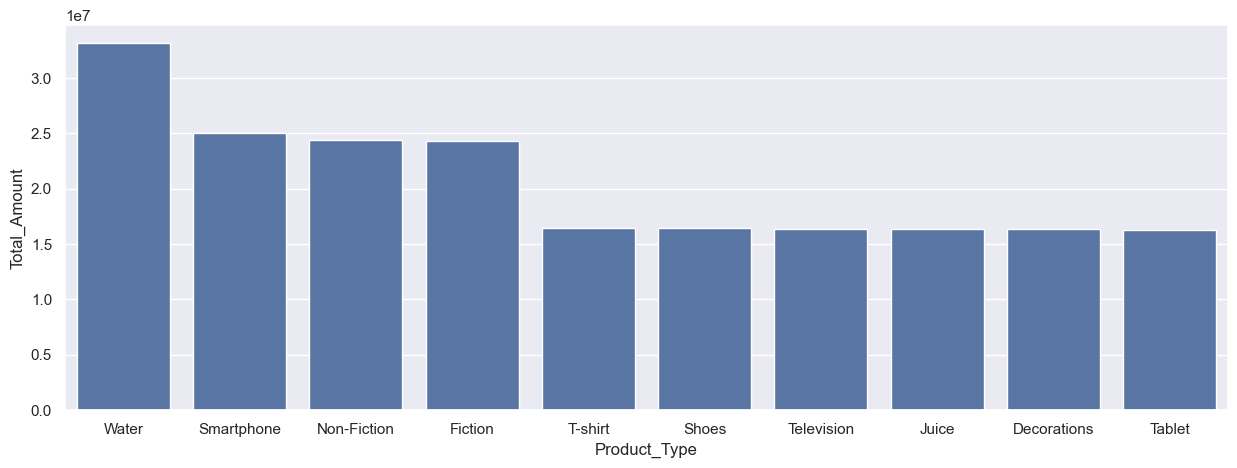

In [30]:
sales_gen = ds.groupby(['Product_Type'], as_index=False)['Total_Amount'].sum().sort_values(by='Total_Amount',ascending=False).head(10)
ax=sns.barplot(x ='Product_Type',y='Total_Amount',data =sales_gen)

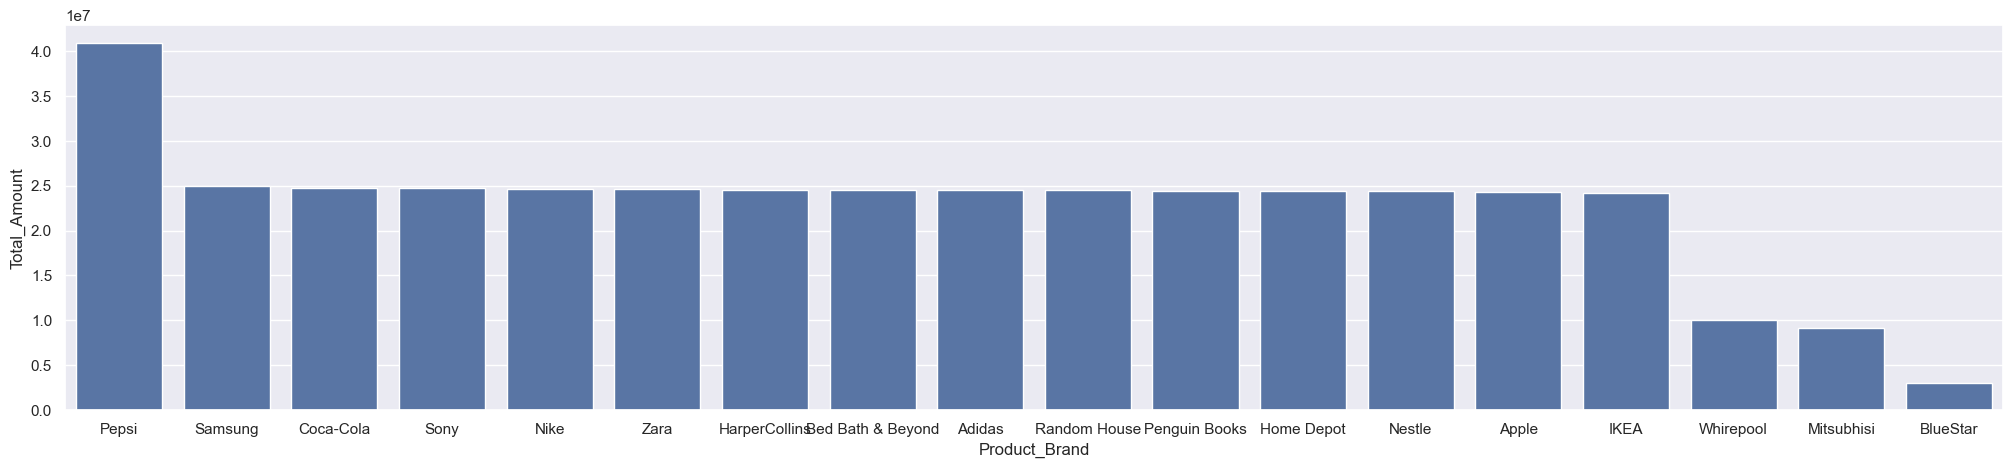

In [31]:
#Product_BrandVsTotal_Amount
sns.set(rc={'figure.figsize':(25,5)})
sales_gen = ds.groupby(['Product_Brand'], as_index=False)['Total_Amount'].sum().sort_values(by='Total_Amount',ascending=False)
ax=sns.barplot(x ='Product_Brand',y='Total_Amount',data =sales_gen)
 

In [32]:
ds.columns

Index(['Customer_ID', 'City', 'State', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Ratings', 'products'],
      dtype='object')

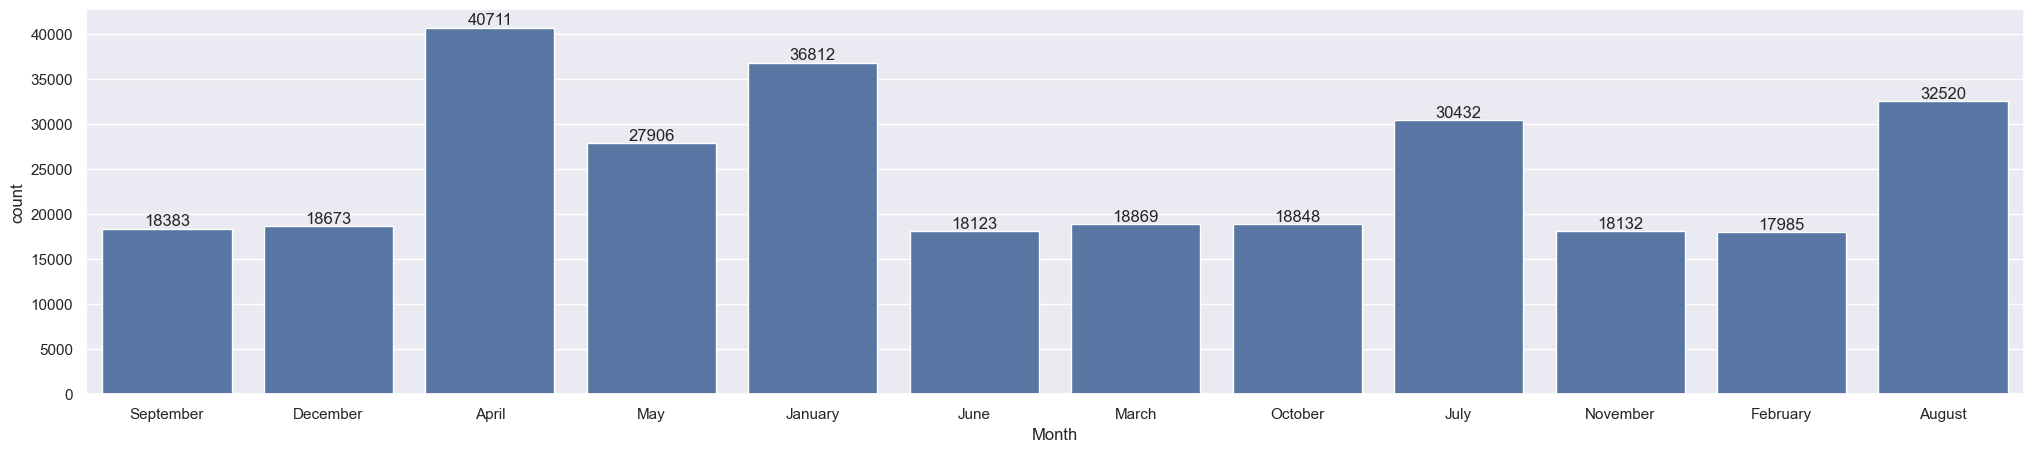

In [33]:
#Month
ax = sns.countplot(x = 'Month' ,data = ds)
for bars in ax. containers:
  ax. bar_label(bars) 

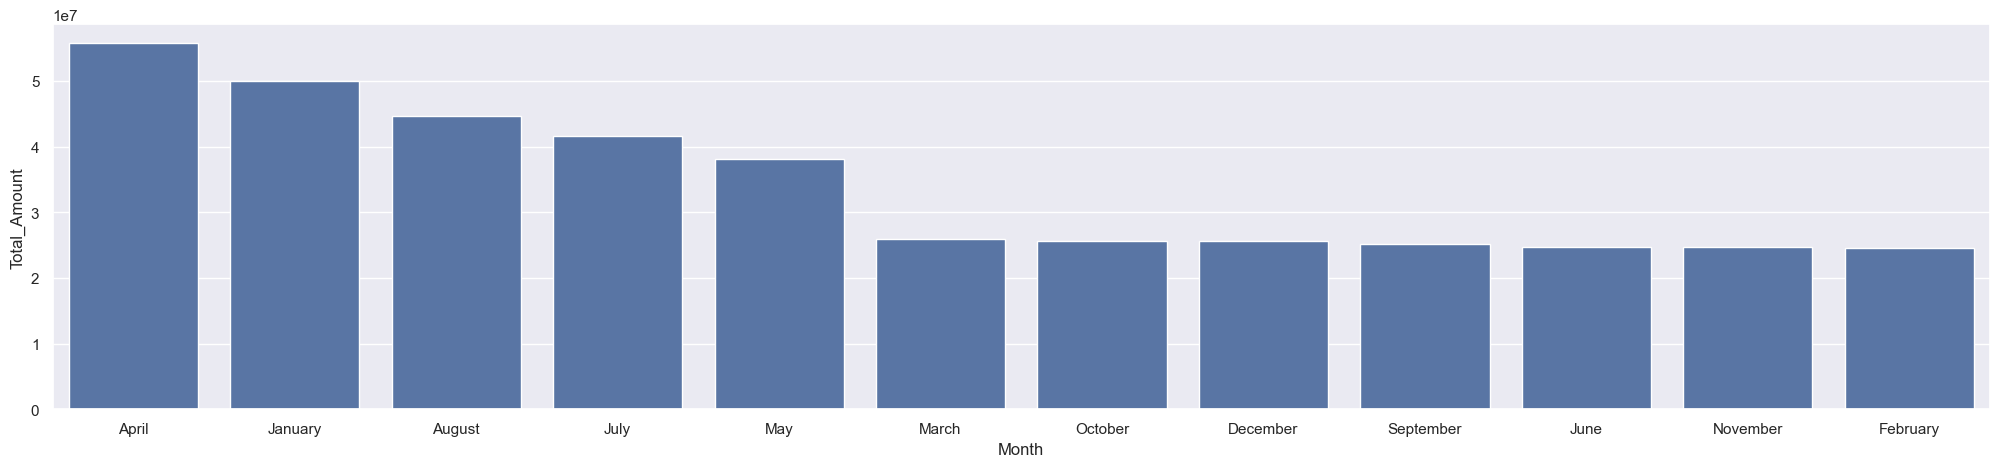

In [34]:
sales_gen = ds.groupby(['Month'], as_index=False)['Total_Amount'].sum().sort_values(by='Total_Amount',ascending=False)
ax=sns.barplot(x ='Month',y='Total_Amount',data =sales_gen)

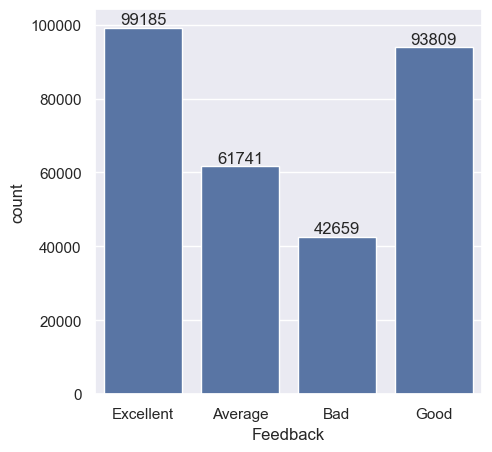

In [35]:
#Feedback
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.countplot(x = 'Feedback' ,data = ds)
for bars in ax. containers:
  ax. bar_label(bars) 

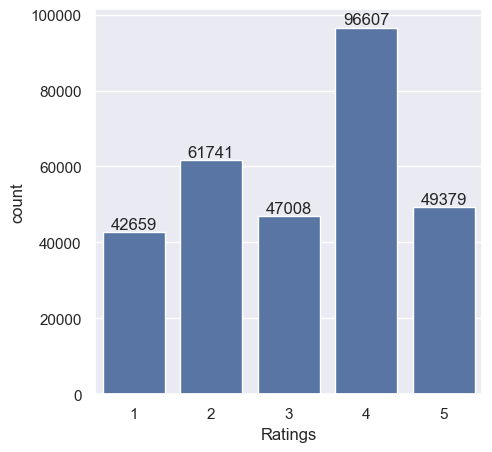

In [36]:
#Ratings
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.countplot(x = 'Ratings' ,data = ds)
for bars in ax. containers:
  ax. bar_label(bars) 

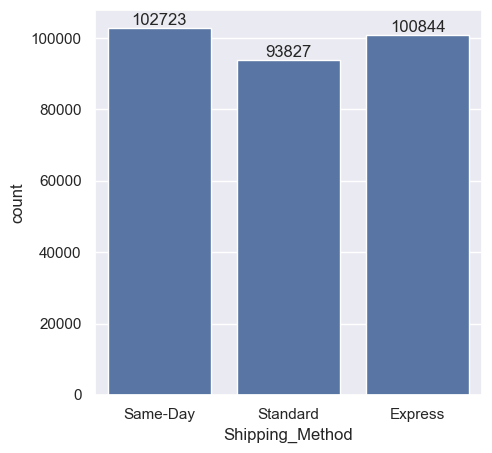

In [37]:
#Shipping_Method
sns.set(rc={'figure.figsize':(5, 5)})
ax = sns.countplot(x = 'Shipping_Method' , data = ds)
for bars in ax. containers:
  ax. bar_label(bars) 

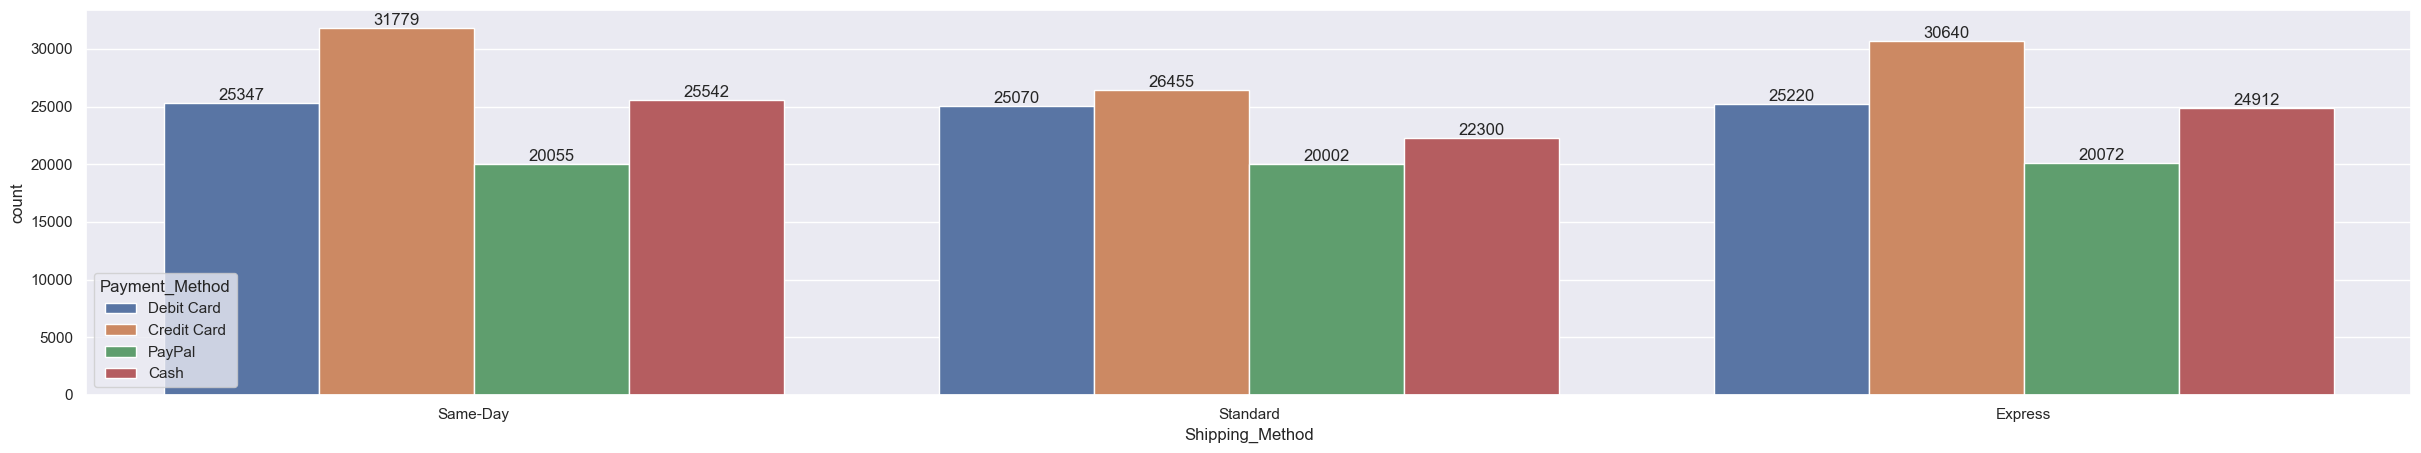

In [38]:
#Payment_Method
sns.set(rc={'figure.figsize':(30, 5)})
ax = sns.countplot(x = 'Shipping_Method' ,hue='Payment_Method', data = ds)
for bars in ax. containers:
  ax. bar_label(bars) 

In [39]:
ds.head(1)

,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,...,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,products
0,37249.0,Dortmund,Berlin,Germany,21,Male,Low,Regular,9/18/2023,2023.0,...,108,324,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,5,Cycling shorts
